In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-minrescg-indefinite)

The following matrix is indefinite.

In [2]:
from numpy.linalg import eig
import scipy.sparse as sp
A = FNC.poisson2d(10) - 20*sp.eye(100)
ev, _ = eig(A.todense())
num_negative_ev = sum(ev < 0)
print(f"There are {sum(ev < 0)} negative and {sum(ev > 0)} positive eigenvalues")

There are 13 negative and 87 positive eigenvalues


We can compute the relevant quantities from {numref}`Theorem {number} <theorem-minrescg-indefinite>`.

In [3]:
m, M = min(-ev[ev < 0]), max(-ev[ev < 0])
kappa_minus = M / m
m, M = min(ev[ev > 0]), max(ev[ev > 0])
kappa_plus = M / m
S = sqrt(kappa_plus * kappa_minus)
rho = sqrt((S - 1) / (S + 1))
print(f"Condition numbers: {kappa_minus:.2e}, {kappa_plus:.2e}")
print(f"Convergence rate: {rho:.3f}")

Condition numbers: 1.02e+01, 3.76e+01
Convergence rate: 0.950


Because the iteration number $m$ is halved in {eq}`minres-conv`, the rate constant of linear convergence is the square root of this number, which makes it even closer to 1.

Now we apply MINRES to a linear system with this matrix, and compare the observed convergence to the upper bound from the theorem.

```{index} ! Python; minres
```

In [4]:
from scipy.sparse.linalg import minres
b = random.rand(100)
resid = [norm(b)]
hist = lambda x: resid.append(norm(b - A @ x))
x, flag = minres(A, b, rtol=1e-8, maxiter=1000, callback=hist)

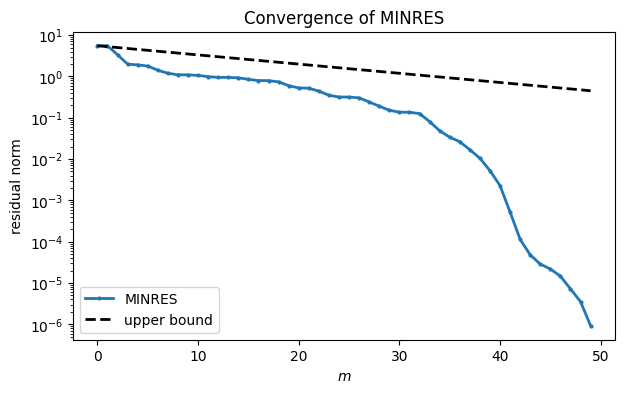

In [5]:
semilogy(resid, ".-");
upper = norm(b) * rho**arange(len(resid))
semilogy(upper, "k--")
xlabel("$m$"),  ylabel("residual norm")
legend(["MINRES", "upper bound"], loc="lower left")
title("Convergence of MINRES");

The upper bound turns out to be pessimistic here, especially in the later iterations. However, you can see a slow linear phase in the convergence that tracks the bound closely.